# Pandas assignment

The problems in this notebook are adapted from Brandon Rhodes's Pycon `pandas` tutorial.

The first few problems are identical.

## Loading the data

This notebook loads two datasets `titles` and ` cast`.  Both are are loaded frim the course website and contain extracts of the IMDB movie data. The second is a fragment of a much larger DataFrame.  

Everything
you need to complete this assignment is included in the **fragment loaded in this section**
in the cells below. 

For those who want to have the entire IMDB-derived dataset, here are some pointers.

Loading the entire IMDB data set used for these tutorial exercises is best done by 
visiting [Brandon Rhodes' github repo](https://github.com/brandon-rhodes/pycon-pandas-tutorial)
and following the instructions.  You can either download a big zip file or, if you have `git` (the main
github API function) installed on your machine, do a `git clone` command. 
In addition to that, 
you will need to download 4 compressed files by ftp that Rhodes
provides links to.  You can then run code
from Rhodes' cloned repo to create the non-truncated version CSV files used in these exercises.
If you do that, you may use the complete dataset to complete these exercises.  Some but not
all of your answers will be dufferent.

The statistics
in the Part B answers will not be correct until you load the complete dataset.  But
you can complete the assignment on the fragment, since I will be evaluating your code,
not the accuracy of your statistics.

In [3]:
# The Python modules you need for thisn assignment.
import pandas as pd
import os.path
import urllib.request 
import os.path
from matplotlib import pyplot as plt

url_dir = 'https://gawron.sdsu.edu/python_for_ss/course_core/data/'

Loading and applying the style sheets in the next two cells customizes the styles of your notebook output,
in particular for how pandas `DataFrame`s are printed.

This is optional,  but it's interesting if you know anything about css files.

In [4]:
target_url1 = os.path.join(url_dir,'style-notebook.css')
target_url2 = os.path.join(url_dir,'style-table.css')

with urllib.request.urlopen(target_url1) as fh1:
    css1 = fh1.read().decode('utf8')
with urllib.request.urlopen(target_url2) as fh2:
    css2 = fh2.read().decode('utf8')
css = css1 + css2

In [5]:
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

The next cell loads the `titles` DataFrame, the first of two used in this assignment.  There are only
two columns, `'title'`  and `'year'`.

In [6]:
titles = pd.read_csv(os.path.join(url_dir,'titles.csv'))
titles.head()

,title,year
0,The Patriarchs,2009
1,Angels in the Attic,1998
2,The Rapture,1991
3,Star na si Van Damme Stallone,2016
4,Sweet Talk,2004


This is a simple `DataFrame` with two columns, containing the title and year of a film.

If a film is remade and given the same title, the title shows up twice:

In [7]:
titles[titles['title']  == 'Around the World in 80 Days']

,title,year
91875,Around the World in 80 Days,2004
121800,Around the World in 80 Days,1956


The next cell loads the `cast` DataFrame, the second of two used in this assignment.  This is
large and will take a while.

In [8]:
# cast = pd.read_csv(os.path.join(url_dir,'data/cast.csv'),index_col = 0)
cast = pd.read_csv(os.path.join(url_dir,'truncated_cast.csv'),index_col=0)
cast.head()

,title,year,name,type,character,n
0,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
1,The Colour of Darkness,2016,Ketan Daraji -Gohel,actor,Chhagan,NaN
2,London Betty,2009,Isaiah Entsua -Mensah,actor,Camera Man,NaN
3,Candelabra,2014,Groovin .,actor,Lt. Dick Sims,5.0
4,Bad Ideas,2012,Hamid .,actor,The Diner,NaN


Please have a look at the columns of the `cast` `DataFrame`and make sure you understand what information it contains. A row uniquely identifies a role in a film; it contains the film title, the year the file was made, the name of the actor or actress playing the role, and the name of the character they played.  The number in the `'n'` column represents the importance of the part, with the lead role receiving a 1 and all less important roles receiving higher numbers. 

Sometimes extras are included; with extras included, a big Hollywood production can easily  cast over 1000 actors and will therefore populate over 1000 rows of `cast`.  The character name for the extras will be "Extra".

In [9]:
len(cast[(cast['title']  == 'Around the World in 80 Days')&(cast['year']  == 1956)])

1299

In [10]:
import numpy as np
np.NaN  == 4

False

In [11]:
cast[(cast['title']  == 'Around the World in 80 Days')]

,title,year,name,type,character,n
784,Around the World in 80 Days,1956,Ronald Adam,actor,Club Steward,47.0
7147,Around the World in 80 Days,1956,Ray Arnett,actor,Extra,NaN
25665,Around the World in 80 Days,1956,Charles Boyer,actor,Monsieur Gasse - Thomas Cook Paris Clerk,5.0
40851,Around the World in 80 Days,2004,Jackie Chan,actor,Passepartout,1.0
40852,Around the World in 80 Days,2004,Jackie Chan,actor,Lau Xing,1.0
...,...,...,...,...,...,...
422807,Around the World in 80 Days,1956,Grace Young,actress,Extra,NaN
422808,Around the World in 80 Days,1956,Mary Young,actress,Extra,NaN
422809,Around the World in 80 Days,2004,Marsha Yuen,actress,Tiger #8 - Crazy Ti,58.0
422810,Around the World in 80 Days,1956,Margaret Zane,actress,Extra,NaN


In [12]:
cast[(cast['year'] == 1956)].iloc[:5]

,title,year,name,type,character,n
784,Around the World in 80 Days,1956,Ronald Adam,actor,Club Steward,47.0
785,Assignment Redhead,1956,Ronald Adam,actor,Dumetrius,3.0
787,Bhowani Junction,1956,Ronald Adam,actor,General Ackerby,NaN
1276,"Blackjack Ketchum, Desperado",1956,Victor Adamson,actor,Townsman,NaN
1464,Litet bo,1956,Edvin Adolphson,actor,Stor-Knutte,3.0


In [13]:
cast[(cast['title']  == 'Around the World in 80 Days')&(cast['year']  == 1956)].iloc[:5]

,title,year,name,type,character,n
784,Around the World in 80 Days,1956,Ronald Adam,actor,Club Steward,47.0
7147,Around the World in 80 Days,1956,Ray Arnett,actor,Extra,NaN
25665,Around the World in 80 Days,1956,Charles Boyer,actor,Monsieur Gasse - Thomas Cook Paris Clerk,5.0
40928,Around the World in 80 Days,1956,Suey Chan,actor,Extra,NaN
44164,Around the World in 80 Days,1956,Martin Cichy,actor,Bartender,NaN


As shown above, there are a number of null or `Nan` values in the `'n'` column.  There are also some very
high numbers in the `'n'` column, but not very many of them.

In [14]:
len(cast[cast['n']>500])

9

A single actor may play more than one role in a film, and both those roles can be the starring role.

In [15]:
cast[(cast['title']=='Around the World in 80 Days')&(cast['year']==2004)&(cast['n']==1)]

,title,year,name,type,character,n
40851,Around the World in 80 Days,2004,Jackie Chan,actor,Passepartout,1.0
40852,Around the World in 80 Days,2004,Jackie Chan,actor,Lau Xing,1.0


## Part A Questions involving selecting and sorting subsets of the rows in the Dataset

### How many movies are listed in the titles dataframe?

As an example, we have put the answer in the next cell.  Be sure to execute the cell containing your solution, so that the answer to the question is displayed in the output as it is in this example.

For each question, first give some thought to which of the two DataFrames loaded in the section entitled "Loading the Data" is best suited to provide an answer.

In [16]:
len(titles)

226013

In [17]:
len(titles['title'])

226013

In [ ]:
### What are the earliest two films listed in the titles dataframe?

#Hint:  This will require using `.sort_values(...)`.

In [18]:
titles_sorted = titles.sort_values('year', ascending=True)
titles_sorted.iloc[0:2]['title']

82467            Miss Jerry
31347    The Startled Lover
Name: title, dtype: object

In [19]:
titles_sorted.iloc[0:2]

,title,year
82467,Miss Jerry,1894
31347,The Startled Lover,1898


### How many movies have the title "Hamlet"?

Hint: one approach is to use a Boolean mask

In [20]:
len(titles[titles['title'] == 'Hamlet'])

20

In [55]:
# titles[titles['title'] == 'Hamlet'] # I just checked the content

### How many movies are titled "North by Northwest"?

In [21]:
len(titles[titles['title'] == 'North by Northwest'])

1

In [59]:
# titles[titles['title'] == 'North by Northwest'] # I just checked the content

### When was the first movie titled "Hamlet" made?

In [22]:
sorted_years = (titles[titles['title'] == 'Hamlet']).sort_values('year')
sorted_years.iloc[0]['year']

1910

### List all of the "Treasure Island" movies from earliest to most recent.

In [23]:
sorted_TI = titles[titles['title'] == 'Treasure Island'].sort_values('year') # Sorting is done in ascending order by default
sorted_TI

,title,year
96793,Treasure Island,1918
122654,Treasure Island,1920
127163,Treasure Island,1934
169035,Treasure Island,1950
99795,Treasure Island,1972
191251,Treasure Island,1973
135165,Treasure Island,1985
146471,Treasure Island,1999


### How many movies were made in the year 1950?

In [95]:
titles

,title,year
0,The Patriarchs,2009
1,Angels in the Attic,1998
2,The Rapture,1991
3,Star na si Van Damme Stallone,2016
4,Sweet Talk,2004
...,...,...
226008,A Light in the Woods Part 1 Presence,2018
226009,Untitled Dirt Track,2017
226010,Diary of a Bad Lad,2010
226011,27 Down,2009


In [105]:
# titles[titles['title'] == 'North by Northwest'] 
len(titles[titles['year'] == 1950])

1109

### How many movies were made in the year 1960?

In [106]:
len(titles[titles['year'] == 1960])

1496

### How many movies were made from 1950 through 1959?

In [109]:
len(titles[(titles['year'] >= 1950) & (titles['year'] <= 1959)])

12664

### In what years has a movie titled "Batman" been released?

In [116]:
(titles[titles['title'] == 'Batman'])['year']

59853    1943
79855    1989
Name: year, dtype: int64

### How many roles were there in the movie "Inception"?

In [118]:
cast

,title,year,name,type,character,n
0,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
1,The Colour of Darkness,2016,Ketan Daraji -Gohel,actor,Chhagan,NaN
2,London Betty,2009,Isaiah Entsua -Mensah,actor,Camera Man,NaN
3,Candelabra,2014,Groovin .,actor,Lt. Dick Sims,5.0
4,Bad Ideas,2012,Hamid .,actor,The Diner,NaN
...,...,...,...,...,...,...
1884292,Two Way Stretch,1960,Peter Sellers,actor,Dodger Lane,1.0
1884293,Up the Creek,1958,Peter Sellers,actor,CPO Doherty,2.0
1884294,Waltz of the Toreadors,1962,Peter Sellers,actor,Gen. Leo Fitzjohn,1.0
1884295,What's New Pussycat,1965,Peter Sellers,actor,Dr. Fritz Fassbender,1.0


In [123]:
# len(cast[cast['title'] == 'Inception']['character']) # Roles = length of characters

78

In [199]:
len(cast[cast['title'] == 'Inception']['character'].unique())

56

In [125]:
# len(cast[cast['title'] == 'Inception']) # Same

78

### But how many roles in the movie "Inception" did receive an "n" value?

The idea is that some of the rows have `NaN` in the `'n'` column.  These are not
values.  To eliminate such rows use the `.notnull()` method.

In [128]:
len(cast[cast['title'] == 'Inception']['n'].notnull())

78

In [140]:
len(cast[(cast['title'] == 'Inception') & (cast['n'].notnull())]['n'])

51

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [159]:
(cast[cast['title'] == 'North by Northwest']).sort_values('n')

,title,year,name,type,character,n
93664,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
356895,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
157014,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
325773,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
38422,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
...,...,...,...,...,...,...
350485,North by Northwest,1959,Maudie Prickett,actress,Elsie - Maid,NaN
361325,North by Northwest,1959,Doris Singh,actress,First United Nations Receptionist,NaN
362650,North by Northwest,1959,Helen Spring,actress,Bidder,NaN
375768,North by Northwest,1959,Susan Whitney,actress,Attendant,NaN


In [160]:
(cast[cast['title'] == 'North by Northwest']).sort_values('n') ['name']# I guess this is the cast

93664              Cary Grant
356895        Eva Marie Saint
157014            James Mason
325773    Jessie Royce Landis
38422          Leo G. Carroll
                 ...         
350485        Maudie Prickett
361325            Doris Singh
362650           Helen Spring
375768          Susan Whitney
376988         Paula Winslowe
Name: name, Length: 116, dtype: object

### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

In [165]:
# cast # Just checked the content

In [166]:
cast[(cast['title'] == 'Sleuth') & (cast['year'] == 1972)].sort_values('n')

,title,year,name,type,character,n
185781,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
35081,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
40179,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
157832,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
284315,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
156284,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0


### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [168]:
cast[(cast['title'] == 'Sleuth') & (cast['year'] == 2007)].sort_values('n')

,title,year,name,type,character,n
35082,Sleuth,2007,Michael Caine,actor,Andrew,1.0
139365,Sleuth,2007,Jude Law,actor,Milo,2.0
195753,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
26741,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
40180,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
284314,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
344594,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


### How many roles were credited in the silent 1921 version of Hamlet?

In [173]:
len(cast[(cast['title'] == 'Hamlet') & (cast['year'] == 1921)]['character'])

9

### How many roles were credited in Branagh’s 1996 Hamlet?

In [183]:
cast[(cast['title'] == 'Hamlet') & (cast['year'] == 1996) & (cast['name'] == 'Kenneth Branagh')]

,title,year,name,type,character,n
26740,Hamlet,1996,Kenneth Branagh,actor,Hamlet,5.0


In [184]:
len(cast[(cast['title'] == 'Hamlet') & (cast['year'] == 1996) & (cast['name'] == 'Kenneth Branagh')])

1

### How many "Hamlet" roles have been listed in all film credits through history?

In [193]:
len(cast[cast['character'] == 'Hamlet'])

30

### How many people have played "James Bond" as a leading role?

Yes, I'm thinking of the Ian Fleming character that has given rise to a whole film franchise,
but I'm going to allow for a little noise.  It
turns out that characters named "James Bond" have come up many times in film history.  Adding
the qualification "as a leading role" helps with that.
This will still leave in a couple of non-Ian Fleming Bonds, but don't worry.
If you just answer the question literally, your
answer should be very close to a list of the actors who've played the
Ian Fleming character.  By the way,  David Niven will be missing from
that list, because the name of the character
listed in the credits of his 1967 parody is not "James Bond" but "Sir James Bond".
It's okay to leave out David Niven.  It was a parody, not a real Bond film.

Note: Relative to this DB (which is dated), the historically correct answer to the question how many actors played the Ian Fleming character is 6. The literal answer to the question in this DB is 
greater than 6 because of a few superfluous Bonds, but if your answer is a lot more than 6
(greater than 10), then there's an issue with your code.  There is a technical challenge in this question;
it is tricky to get exactly the right list of actors.

In [ ]:
# In the line of code below, I am checking the whole cast dataframe to see who played character 'James Bond',
# then I am checking the whole cast dataframe to find out every leading role,
# I find the intersection of the 2 dataframes, using the key 'name' and method unique()

In [211]:
len((cast[(cast['character'] == 'James Bond') & (cast['n'] == 1)]['name']).unique())

8

### How many people have played a role called "The Dude"?

In [218]:
len(cast[cast['character'] == 'The Dude']['name']) # With or without unique(), 17

17

### How many people have played a role called "The Stranger"?

In [224]:
len(cast[cast['character'] == 'The Stranger']['name'].unique()) # 170 without unique(), but as I understand we need "unique" people

160

### How many roles has Sidney Poitier played throughout his career?

In [237]:
len(cast[cast['name'] == 'Sidney Poitier']['character'])

43

### How many roles has Judi Dench played?

In [238]:
len(cast[cast['name'] == 'Judi Dench']['character'])

55

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

In [252]:
cast[(cast['name'] == 'Cary Grant') & (cast['n'] == 2) & (cast['year'] >= 1940) & (cast['year'] <= 1949)].sort_values('year')

,title,year,name,type,character,n
93661,My Favorite Wife,1940,Cary Grant,actor,Nick Arden,2.0
93671,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


In [253]:
cast[(cast['name'] == 'Cary Grant') & (cast['n'] == 2) & (cast['year'] >= 1940) & (cast['year'] <= 1949)].sort_values('year')['character']

93661     Nick Arden
93671    Roger Adams
Name: character, dtype: object

### List the leading roles that Cary Grant played in the 1940s in order by year.

In [256]:
cast[(cast['name'] == 'Cary Grant') & (cast['n'] == 1) & (cast['year'] >= 1940) & (cast['year'] <= 1949)].sort_values('year')

,title,year,name,type,character,n
93686,The Howards of Virginia,1940,Cary Grant,actor,Matt Howard,1.0
93645,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0
93688,The Philadelphia Story,1940,Cary Grant,actor,C. K. Dexter Haven,1.0
93676,Suspicion,1941,Cary Grant,actor,Johnnie Aysgarth,1.0
93690,The Talk of the Town,1942,Cary Grant,actor,Leopold Dilg,1.0
93667,Once Upon a Honeymoon,1942,Cary Grant,actor,Patrick 'Pat' O'Toole,1.0
93636,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0
93660,Mr. Lucky,1943,Cary Grant,actor,Joe Adams -posing as Joe Bascopolous,1.0
93668,Once Upon a Time,1944,Cary Grant,actor,Jerry Flynn,1.0
93628,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0


In [257]:
cast[(cast['name'] == 'Cary Grant') & (cast['n'] == 1) & (cast['year'] >= 1940) & (cast['year'] <= 1949)].sort_values('year')['character']

93686                             Matt Howard
93645                            Walter Burns
93688                      C. K. Dexter Haven
93676                        Johnnie Aysgarth
93690                            Leopold Dilg
93667                   Patrick 'Pat' O'Toole
93636                           Capt. Cassidy
93660    Joe Adams -posing as Joe Bascopolous
93668                             Jerry Flynn
93628                       Mortimer Brewster
93663                              Ernie Mott
93662                             Cole Porter
93665                                  Devlin
93682                             Dick Nugent
93683                                  Dudley
93659                           Jim Blandings
93640                       Dr. Madison Brown
93649                   Captain Henri Rochard
Name: character, dtype: object

### How many roles were available for actors in the 1920s?

In [265]:
len(cast[(cast['year'] > 1919) & (cast['year'] < 1930) & (cast['type'] == 'actor')])

48111

In [264]:
cast

,title,year,name,type,character,n
0,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
1,The Colour of Darkness,2016,Ketan Daraji -Gohel,actor,Chhagan,NaN
2,London Betty,2009,Isaiah Entsua -Mensah,actor,Camera Man,NaN
3,Candelabra,2014,Groovin .,actor,Lt. Dick Sims,5.0
4,Bad Ideas,2012,Hamid .,actor,The Diner,NaN
...,...,...,...,...,...,...
1884292,Two Way Stretch,1960,Peter Sellers,actor,Dodger Lane,1.0
1884293,Up the Creek,1958,Peter Sellers,actor,CPO Doherty,2.0
1884294,Waltz of the Toreadors,1962,Peter Sellers,actor,Gen. Leo Fitzjohn,1.0
1884295,What's New Pussycat,1965,Peter Sellers,actor,Dr. Fritz Fassbender,1.0


# How many roles were available for actresses in the 1920s?

In [266]:
len(cast[(cast['year'] > 1919) & (cast['year'] < 1930) & (cast['type'] == 'actress')])

23826

## Part B:  Questions needing value_counts, pivot_tables, or cross tabulation

### Of the films made before 1939, which had the largest cast?

After you've made a DataFrame containing the set of rows in `cast` that you're interested in,
you need to do a computation that counts cast members by film.  The question to think about
is what you want to count.  You **don't** want to do this:

```
pd.crosstab(cast_pre_1939['title'],cast_pre_1939['name'])
```

since after a **very** long computation, this will end up telling you
the number of characters each actor/actress played in each film
(which is usually 1).

So think about the structure of the data.  This is actually pretty simple.

Once you get a reasonable looking answer, you may want to do the same computation
fro the entire `cast` DataFrame, to find out what film had the largest cast all time.

In [24]:
cast

,title,year,name,type,character,n
0,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
1,The Colour of Darkness,2016,Ketan Daraji -Gohel,actor,Chhagan,NaN
2,London Betty,2009,Isaiah Entsua -Mensah,actor,Camera Man,NaN
3,Candelabra,2014,Groovin .,actor,Lt. Dick Sims,5.0
4,Bad Ideas,2012,Hamid .,actor,The Diner,NaN
...,...,...,...,...,...,...
1884292,Two Way Stretch,1960,Peter Sellers,actor,Dodger Lane,1.0
1884293,Up the Creek,1958,Peter Sellers,actor,CPO Doherty,2.0
1884294,Waltz of the Toreadors,1962,Peter Sellers,actor,Gen. Leo Fitzjohn,1.0
1884295,What's New Pussycat,1965,Peter Sellers,actor,Dr. Fritz Fassbender,1.0


In [25]:
cast_pre_1939 = cast[cast['year'] < 1939]
#pd.pivot
# Group the players into teams, take the mean age and salary for each time, 
# make a datafra,
#pt = pd.pivot_table(nba_df,index='Team', values=["Salary","Age"],aggfunc='mean')
pt0 = pd.pivot_table(cast,index=['title','year'],aggfunc='count')
pt0

,,character,n,name,type
title,year,,,,
"#73, Shaanthi Nivaasa",2007,1,1,1,1
#Declimax,2018,1,0,1,1
#DigitalLivesMatter,2016,2,0,2,2
#Enough,2015,2,0,2,2
#Lucky Number,2015,2,1,2,2
...,...,...,...,...,...
sTelth,2016,1,0,1,1
u'Bejani,1997,1,1,1,1
xXx,2002,3,2,3,3


In [295]:
# pd.crosstab(cast_pre_1939['title'],cast_pre_1939['name']) # NOT this

In [298]:
# pre_1939_table = pd.crosstab(cast_pre_1939['title'],cast_pre_1939['name'], values= cast_pre_1939['name'], aggfunc='sum') #values= cast_pre_1939['births'],

In [297]:
# pre_1939_table

In [277]:
pt0['character'].loc['Around the World in 80 Days']

year
1956    1299
2004      65
Name: character, dtype: int64

In [278]:
pt0['character'].loc[('Around the World in 80 Days',1956)]

1299

In [282]:
pt0['character'].loc[('Around the World in 80 Days',2004)]

65

In [279]:
print(len(cast[cast['title']=='Around the World in 80 Days']))
print(len(cast[(cast['title']=='Around the World in 80 Days')& (cast['year']==1956)]))
print(len(cast[(cast['title']=='Around the World in 80 Days')& (cast['year']==2004)]))

1364
1299
65


In [139]:
pre_1939 = cast[(cast['year']<1939)]

In [301]:
len(pre_1939)

289059

In [302]:
pt0 = pd.pivot_table(cast,index=['title','year'],aggfunc='count')

In [303]:
pt0

,,character,n,name,type
title,year,,,,
"#73, Shaanthi Nivaasa",2007,1,1,1,1
#Declimax,2018,1,0,1,1
#DigitalLivesMatter,2016,2,0,2,2
#Enough,2015,2,0,2,2
#Lucky Number,2015,2,1,2,2
...,...,...,...,...,...
sTelth,2016,1,0,1,1
u'Bejani,1997,1,1,1,1
xXx,2002,3,2,3,3


In [307]:
pd.crosstab(cast_pre_1939['title'],cast_pre_1939['name'])

character    1
n            1
name         1
type         1
Name: (#73, Shaanthi Nivaasa, 2007), dtype: int64

In [75]:
pt00 = cast_pre_1939.pivot_table( 'character', index=['title'], aggfunc='count')
sorted_pre_1939 = pt00.sort_values(by='character')
sorted_pre_1939

,character
title,
Little Red Decides,1
Der Letzte Gang,1
Where D'Ye Get That Stuff?,1
Der Mann im Schrank,1
Richthofen,1
...,...
You Can't Take It with You,161
The Merry Widow,164
The Buccaneer,172


In [76]:
sorted_pre_1939.index[-1] # I guess Wells Fargo it is

'Wells Fargo'

In [77]:
# These lines of code should sort the movies in ascending order based on the cast number for the whole cast dataset
pt000 = cast.pivot_table( 'character', index=['title'], aggfunc='count')
sorted_all_years = pt000.sort_values(by='character')

In [78]:
sorted_all_years

,character
title,
"#73, Shaanthi Nivaasa",1
Toughest Man in Arizona,1
Piggy,1
Hitting Home,1
Toul omry,1
...,...
Union Pacific,183
Wells Fargo,193
Mr. Smith Goes to Washington,217


### Of the films made in either 1939 or 1966, what films had a cast size of 90 or more but fewer than 100?

This is a follow-up to the previous question which takes you a little deeper.

After you've made a DataFrame containing the set of rows in `cast` that you're interested in,
you again need to do a computation that's counts cast members on films.   As noted
above there is a simple computation  that seems to give you the cast sizes of all films.

But to answer this question correctly,  you will need to
come up with a slightly more complicated answer. The issue to
think about is remakes.  In fact in 1966 there were some remakes of
great 1939 films.  How should that affect your answer to this
problem?


In [121]:
in_1939 = (cast['year'] == 1939)
in_1966 = (cast['year'] == 1966)
either_1939_OR_1966 =  cast[((in_1939) ^ (in_1966))] # cast[~((in_1939) | (in_1966))]
either_1939_OR_1966

,title,year,name,type,character,n
354,Anupama,1966,David (II) Abraham,actor,Moses,17.0
360,Daadi Maa,1966,David (II) Abraham,actor,Balram,12.0
813,"6,000 Enemies",1939,Ernie Adams,actor,Henchman,NaN
1130,We Are Not Alone,1939,Lowden Adams,actor,Detective,NaN
1245,Scouts to the Rescue,1939,Victor Adams,actor,Henchman Hurst,12.0
...,...,...,...,...,...,...
421487,At avrat silah,1966,Nebahat Çehre,actress,Alicik,2.0
421488,Yedi dagin aslani,1966,Nebahat Çehre,actress,Alanya,2.0
421489,Adamsson i Sverige,1966,Gudrun Östbye,actress,Rosa,6.0
421490,Allahaismarladik,1966,Sema Özcan,actress,Betty,2.0


In [122]:
pt_1939_OR_1966 = either_1939_OR_1966.pivot_table( 'character', index=['title'], aggfunc='count')
sorted_in_1939_OR_1966 = pt_1939_OR_1966.sort_values(by='character') # Sorted data makes more sense to me
sorted_in_1939_OR_1966

,character
title,
David Marel: Pleyboy-Ditektib,1
La Sombra: Ang Anino,1
Kutsukake Tokijiro - yukyo ippiki,1
Daak Babu,1
Dalaga Mayor,1
...,...
The Wizard of Oz,130
Gone with the Wind,148
Second Fiddle,173


In [128]:
sorted_in_1939_OR_1966[(sorted_in_1939_OR_1966['character'] >= 90) & (sorted_in_1939_OR_1966['character'] < 100)]

,character
title,
Stagecoach,90
Sergeant Madden,92
Torn Curtain,93
Another Thin Man,94
Beau Geste,97


### How many films made before 1939 have a cast of size 1.

In [142]:
cast_1939 = cast[cast['year'] < 1939]
pt_1939_1 = cast_1939.pivot_table( 'character', index=['title'], aggfunc='count')
len(pt_1939_1['character'] == 1)

20177

### How many movies have had remakes?

Film buffs will know this is much harder than it might seem.  To make this
doable, let's look only at remakes that have the same title, and let's assume (falsely)
that when two movies have the same title, the later one is a remake of the earlier one.

In [153]:
len(cast) - len(cast['title'].unique()) # Total number - unique, non-repeated data

347426

### Plot the number of male and female roles year by year (up through 2017)

So you want years on the x-axis and two lines, one
tracking the number of male roles and another tracking the number of female roles.

Note this plot will not be realistic because of the way our data has been sampled,
so I'll just be evaluating the code, not the accuracy.

In [183]:
through_2017 = cast[cast['year'] < 2018]
sort = through_2017.sort_values(by='year')
genderRoles = through_2017.pivot_table('character', index = ['year'], columns = 'type', aggfunc='count')
genderRoles

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
...,...,...
2013,2186.0,1239.0
2014,2374.0,1367.0
2015,2396.0,1388.0


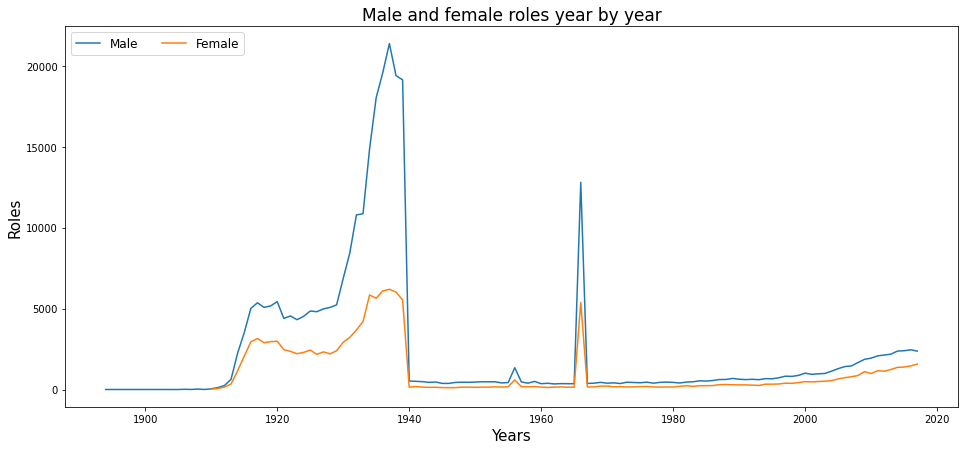

In [202]:
# Plotting the Graph using Matplotlib:

genderRoles.plot(figsize = (16,7))

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Roles", fontsize = 15)

plt.title("Male and female roles year by year", fontsize = 17)
plt.legend(labels = ['Male', 'Female'], loc="upper left", prop={'size': 12}, ncol=2)
plt.show()

### Plot the percentages of all roles that are female year by year for the century from 1917 through 2017

You are continuing your study of the imbalance of male and female roles.  Years on the x-axis,
one line tracking the percentage of female roles.

Comment: This is  a very interesting plot, which is begging for a story to explain it.
On the truncated sample, the plot has some serious flaws, but the general pattern you
see is correct.

In [213]:
from_1917_through_2017 = cast[(cast['year'] > 1916) & (cast['year'] < 2018)]
sort_y = from_1917_through_2017.sort_values(by='year')
genRoles = from_1917_through_2017.pivot_table('character', index = ['year'], columns = 'type', aggfunc='count')
FemaleP = (genRoles['actress'] / (genRoles['actor'] + genRoles['actress'])) * 100
FemaleP

year
1917    37.059238
1918    36.308851
1919    36.409561
1920    35.455086
1921    35.945709
          ...    
2013    36.175182
2014    36.541032
2015    36.680761
2016    37.263427
2017    39.858012
Length: 101, dtype: float64

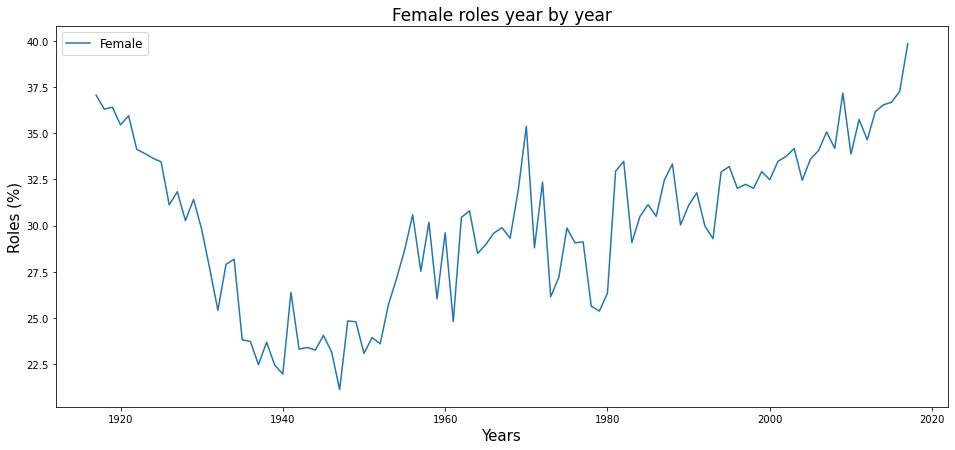

In [215]:
# Plotting the Graph using Matplotlib:

FemaleP.plot(figsize = (16,7))

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Roles (%)", fontsize = 15)

plt.title("Female roles year by year", fontsize = 17)
plt.legend(labels = ['Female'], loc="upper left", prop={'size': 12}, ncol=1)
plt.show()